# Often times, you might be missing dynamic data field along a track, or the data may be unreliable. This is particularly true with Speeds, Accelerations, Coursings, Turning Rates, etc.

# These can be derived from the spatiotemporal points if you need to replace/create them. As well, a number of features can be engineered from the data to aid in downstream ML applications.
___

In [1]:
import trackio as tio
import matplotlib.pyplot as plt
import numpy as np

## Let's use some of the AIS data we processed in the last notebook

In [2]:
#create the Dataset
ds = tio.read(data_path='example00')

___
## Coursing Computation

In [ ]:
#define a track id
track_id = ds.tracks.index[61]

#get original track
original = ds.get_track(track_id)

In [ ]:
#compute the coursing from the points
ds = ds.compute_coursing(tracks=[track_id],
                         method='middle')

In [ ]:
#get computed track
computed = ds.get_track(track_id)

In [ ]:
#plot the two
fig, ax = plt.subplots(1, 2)

#original
ax[0].plot(original['X'], original['Y'])
u = np.sin(np.radians(original['Coursing']))
v = np.cos(np.radians(original['Coursing']))
ax[0].quiver(original['X'], original['Y'], u, v, scale=10)
ax[0].set_aspect('equal')

#computed
ax[1].plot(computed['X'], computed['Y'])
u = np.sin(np.radians(computed['Coursing']))
v = np.cos(np.radians(computed['Coursing']))
ax[1].quiver(computed['X'], computed['Y'], u, v, scale=10)
ax[1].set_aspect('equal')

___
## Turning Rate Computation

## This simply uses the coursings, so make sure they're correct or compute them first.

In [ ]:
#define a track id
track_id = ds.tracks.index[17]

#get original track
original = ds.get_track(track_id)

In [ ]:
#compute the turning from the coursings - output is deg/sec
ds = ds.compute_turning_rate(tracks=[track_id],
                             method='middle')

In [ ]:
#get computed track
computed = ds.get_track(track_id)

In [ ]:
#plot the two
fig, ax = plt.subplots(1, 2)

#original didn't contain turning rate
ax[0].plot(original['X'], original['Y'])

#computed
ax[1].plot(computed['X'], computed['Y'])
m = ax[1].scatter(computed['X'], computed['Y'], c=computed['Turning Rate'], vmin=-0.3, vmax=0.3)
fig.colorbar(m)

___
## Speed Computation


In [ ]:
#define a track id
track_id = ds.tracks.index[21]

#get original track
original = ds.get_track(track_id)

In [ ]:
#compute the speed - units is CRS xy units per second (e.g. m/s, deg/s)
ds = ds.compute_speed(tracks=[track_id],
                      method='middle')

In [ ]:
#get computed track
computed = ds.get_track(track_id)

In [ ]:
#plot the two
fig, ax = plt.subplots(1, 2)

#original
ax[0].plot(original['X'], original['Y'])
m = ax[0].scatter(original['X'], original['Y'], c=original['Speed'])
fig.colorbar(m)

#computed
ax[1].plot(computed['X'], computed['Y'])
m = ax[1].scatter(computed['X'], computed['Y'], c=computed['Speed'])
fig.colorbar(m)

___
## Acceleration Computation

## This simply uses the speeds, so make sure they're correct or compute them first.

In [ ]:
#define a track id
track_id = ds.tracks.index[21]

#get original track
original = ds.get_track(track_id)

In [ ]:
#compute the acceleration
ds = ds.compute_acceleration(tracks=[track_id],
                             method='middle')

In [ ]:
#get computed track
computed = ds.get_track(track_id)

In [ ]:
#plot the two
fig, ax = plt.subplots(1, 2)

#original didn't contain acceleration
ax[0].plot(original['X'], original['Y'])

#computed
ax[1].plot(computed['X'], computed['Y'])
m = ax[1].scatter(computed['X'], computed['Y'], c=computed['Acceleration'])
fig.colorbar(m)

___
## Distance Travelled

Cumulative distance travelled over the track

In [ ]:
#define a track id
track_id = ds.tracks.index[50]

#compute distance travelled along track
ds = ds.compute_distance_travelled(tracks=[track_id])

In [ ]:
#get computed track
computed = ds.get_track(track_id)

#plot
fig, ax = plt.subplots()
ax.plot(computed['X'], computed['Y'])
m = ax.scatter(computed['X'], computed['Y'], c=computed['Distance Travelled'])
fig.colorbar(m)

___
## Radius of Curvature

In [7]:
#define a track id
track_id = ds.tracks.index[11]

#compute radius of curvature
ds = ds.compute_radius_of_curvature(tracks=[track_id])

Computing radius of curvature: 100%|██████████| 1/1 [00:00<00:00, 76.92it/s]


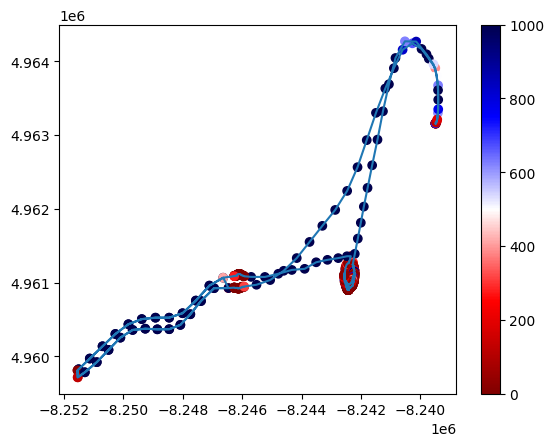

In [12]:
#get computed track
computed = ds.get_track(track_id)

#plot
fig, ax = plt.subplots()
ax.plot(computed['X'], computed['Y'])
m = ax.scatter(computed['X'], computed['Y'], c=computed['Radius of Curvature'], vmin=0, vmax=1000, cmap='seismic_r')
fig.colorbar(m)

___
## Sinuosity Computation

Here, sinuosity is calculated as the total length divided by the effective length (straight from start to end). A rolling window is applied to calculate the sinuosity from a localized segment around each point.

In [15]:
#define a track id
track_id = ds.tracks.index[48]

#compute radius of curvature
ds = ds.compute_sinuosity(tracks=[track_id], window=9)

Computing sinuosity: 100%|██████████| 1/1 [00:00<00:00, 43.48it/s]


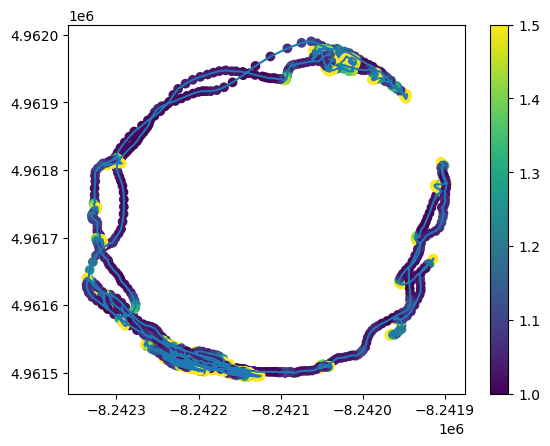

In [16]:
#get computed track
computed = ds.get_track(track_id)

#plot
fig, ax = plt.subplots()
ax.plot(computed['X'], computed['Y'])
m = ax.scatter(computed['X'], computed['Y'], c=computed['Sinuosity'], vmin=1, vmax=1.5)
fig.colorbar(m)

___
## Notice that during this process, all of these metadata properties were updated in the `repr` and `Dataset.meta` property.

In [ ]:
ds = ds.refresh_meta(ncores=4)

ds